# $D_{s1}(2460)^+\to D_s^+\gamma$ production study
## Trigger efficiencies
### Data analysis and MC analysis
#### Trigger efficiencies over data: Computation

Iván Cambón Bouzas

Instituto Galego de Física de Altas Enerxías

Universidade de Santiago de Compostela



In [1]:
import ROOT
from datetime import datetime
import numpy as np
import sys 
import uncertainties as un
import pandas as pd 
from particle import Particle
import matplotlib.pyplot as plt
import os
ROOT.EnableImplicitMT()
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyFit')
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyShort')
import RooPyFit as rpf
import RooPyShort as rsh

print(datetime.now())

ROOT.gROOT.ProcessLine(".L lhcbStyle.C")
ROOT.lhcbStyle()

%jsroot on

Welcome to JupyROOT 6.28/04
2024-03-20 13:00:49.115802
-------------------------
Set LHCb Style - May 2021
-------------------------


In [2]:
if not os.path.exists("./Graphs"):
    os.makedirs("./Graphs")
else:
    print("Graphs directory already exists")

if not os.path.exists("./root_files"):
    os.makedirs("./root_files")
else:
    print("root_files directory already exists")

if not os.path.exists("./Tables"):
    os.makedirs("./Tables")
else:
    print("Tables directory already exists")
    
if not os.path.exists("./Results"):
    os.makedirs("./Results")
else:
    print("Tables directory already exists")

Graphs directory already exists
root_files directory already exists
Tables directory already exists
Tables directory already exists


## TISTOS Fits parameters reading

In [3]:
Years = ["2018"]
ninters = 5
path = "/home3/ivan.cambon/DsJ_states_production_research/Ds1DsGamma_analysis/Data_Analysis/Velo_fits"

if Years != 'Run2':
    
    Dsst_TIS_vals_files = ["Results/Exp_{0}_Dsg_mass_Dsst_ufit_free_vals_str3_{1}Velo_TIS.csv".format(Year, ninters) for Year in Years]
    Dsst_TIS_uncs_files = ["Results/Exp_{0}_Dsg_mass_Dsst_ufit_free_uncs_str3_{1}Velo_TIS.csv".format(Year, ninters) for Year in Years]
    
    Dsst_TOS_vals_files = ["Results/Exp_{0}_Dsg_mass_Dsst_ufit_free_vals_str3_{1}Velo_TOS.csv".format(Year, ninters) for Year in Years]
    Dsst_TOS_uncs_files = ["Results/Exp_{0}_Dsg_mass_Dsst_ufit_free_uncs_str3_{1}Velo_TOS.csv".format(Year, ninters) for Year in Years]
    
    Dsst_TISTOS_vals_files = ["Results/Exp_{0}_Dsg_mass_Dsst_ufit_free_vals_str3_{1}Velo_TISTOS.csv".format(Year, ninters) for Year in Years]
    Dsst_TISTOS_uncs_files = ["Results/Exp_{0}_Dsg_mass_Dsst_ufit_free_uncs_str3_{1}Velo_TISTOS.csv".format(Year, ninters) for Year in Years]
    
    Ds1_TIS_vals_files = ["Results/Exp_{0}_Dsg_mass_Ds1_ufit_free_vals_str3_{1}Velo_TIS.csv".format(Year, ninters) for Year in Years]
    Ds1_TIS_uncs_files = ["Results/Exp_{0}_Dsg_mass_Ds1_ufit_free_uncs_str3_{1}Velo_TIS.csv".format(Year, ninters) for Year in Years]
    
    Ds1_TOS_vals_files = ["Results/Exp_{0}_Dsg_mass_Ds1_ufit_free_vals_str3_{1}Velo_TOS.csv".format(Year, ninters) for Year in Years]
    Ds1_TOS_uncs_files = ["Results/Exp_{0}_Dsg_mass_Ds1_ufit_free_uncs_str3_{1}Velo_TOS.csv".format(Year, ninters) for Year in Years]
    
    Ds1_TISTOS_vals_files = ["Results/Exp_{0}_Dsg_mass_Ds1_ufit_free_vals_str3_{1}Velo_TISTOS.csv".format(Year, ninters) for Year in Years]
    Ds1_TISTOS_uncs_files = ["Results/Exp_{0}_Dsg_mass_Ds1_ufit_free_uncs_str3_{1}Velo_TISTOS.csv".format(Year, ninters) for Year in Years]
    
    Dsst_trig_vals_files = ["{0}/Results/Exp_{1}_Dsg_mass_Dsst_ufit_free_vals_str3_{2}Velo.csv".format(path, Year, ninters) for Year in Years]
    Dsst_trig_uncs_files = ["{0}/Results/Exp_{1}_Dsg_mass_Dsst_ufit_free_uncs_str3_{2}Velo.csv".format(path, Year, ninters) for Year in Years]

    Ds1_trig_vals_files = ["{0}/Results/Exp_{1}_Dsg_mass_Ds1_ufit_free_vals_str3_{2}Velo.csv".format(path, Year, ninters) for Year in Years]
    Ds1_trig_uncs_files = ["{0}/Results/Exp_{1}_Dsg_mass_Ds1_ufit_free_uncs_str3_{2}Velo.csv".format(path, Year, ninters) for Year in Years]

In [4]:
dfs_Dsst_TIS_vals = [pd.read_csv(file) for file in Dsst_TIS_vals_files]
dfs_Dsst_TIS_uncs = [pd.read_csv(file) for file in Dsst_TIS_uncs_files]

dfs_Dsst_TOS_vals = [pd.read_csv(file) for file in Dsst_TOS_vals_files]
dfs_Dsst_TOS_uncs = [pd.read_csv(file) for file in Dsst_TOS_uncs_files]

dfs_Dsst_TISTOS_vals = [pd.read_csv(file) for file in Dsst_TISTOS_vals_files]
dfs_Dsst_TISTOS_uncs = [pd.read_csv(file) for file in Dsst_TISTOS_uncs_files]

dfs_Dsst_trig_vals = [pd.read_csv(file) for file in Dsst_trig_vals_files]
dfs_Dsst_trig_uncs = [pd.read_csv(file) for file in Dsst_trig_uncs_files]

dfs_Ds1_TIS_vals = [pd.read_csv(file) for file in Ds1_TIS_vals_files]
dfs_Ds1_TIS_uncs = [pd.read_csv(file) for file in Ds1_TIS_uncs_files]

dfs_Ds1_TOS_vals = [pd.read_csv(file) for file in Ds1_TOS_vals_files]
dfs_Ds1_TOS_uncs = [pd.read_csv(file) for file in Ds1_TOS_uncs_files]

dfs_Ds1_TISTOS_vals = [pd.read_csv(file) for file in Ds1_TISTOS_vals_files]
dfs_Ds1_TISTOS_uncs = [pd.read_csv(file) for file in Ds1_TISTOS_uncs_files]

dfs_Ds1_trig_vals = [pd.read_csv(file) for file in Ds1_trig_vals_files]
dfs_Ds1_trig_uncs = [pd.read_csv(file) for file in Ds1_trig_uncs_files]

## $\varepsilon_{\mathrm{trig}}$ vs nVeloTracks

In [5]:
def efficiencies(N1, N2, uN1, uN2):
    eff = N1 / N2
    ueff = eff * np.sqrt((uN1/N1)**2 + (uN2/N2)**2)
    return eff, ueff

In [6]:
eff_TIS_Dsst, ueff_TIS_Dsst = efficiencies((dfs_Dsst_TISTOS_vals[0])["NDsst"], (dfs_Dsst_TOS_vals[0])["NDsst"],
                                           (dfs_Dsst_TISTOS_uncs[0])["NDsst"], (dfs_Dsst_TOS_uncs[0])["NDsst"])
eff_TOS_Dsst, ueff_TOS_Dsst = efficiencies((dfs_Dsst_TISTOS_vals[0])["NDsst"], (dfs_Dsst_TIS_vals[0])["NDsst"],
                                           (dfs_Dsst_TISTOS_uncs[0])["NDsst"], (dfs_Dsst_TIS_uncs[0])["NDsst"])

eff_TIS_Ds1, ueff_TIS_Ds1 = efficiencies((dfs_Ds1_TISTOS_vals[0])["NDs1"], (dfs_Ds1_TOS_vals[0])["NDs1"],
                                         (dfs_Ds1_TISTOS_uncs[0])["NDs1"], (dfs_Ds1_TOS_uncs[0])["NDs1"])
eff_TOS_Ds1, ueff_TOS_Ds1 = efficiencies((dfs_Ds1_TISTOS_vals[0])["NDs1"], (dfs_Ds1_TIS_vals[0])["NDs1"],
                                         (dfs_Ds1_TISTOS_uncs[0])["NDs1"], (dfs_Ds1_TIS_uncs[0])["NDs1"])

eff_trig_Dsst = (dfs_Dsst_trig_vals[0])["NDsst"] * eff_TIS_Dsst / (dfs_Dsst_TIS_vals[0])["NDsst"]
ueff_trig_Dsst = np.sqrt(((dfs_Dsst_trig_uncs[0])["NDsst"] * eff_TIS_Dsst / (dfs_Dsst_TIS_vals[0])["NDsst"])**2+
                         ((dfs_Dsst_trig_vals[0])["NDsst"] * ueff_TIS_Dsst / (dfs_Dsst_TIS_vals[0])["NDsst"])**2+
                         ((dfs_Dsst_trig_vals[0])["NDsst"] * eff_TIS_Dsst * (dfs_Dsst_TIS_uncs[0])["NDsst"] / ((dfs_Dsst_TIS_vals[0])["NDsst"])**2)**2)

eff_trig_Ds1 = (dfs_Ds1_trig_vals[0])["NDs1"] * eff_TIS_Ds1 / (dfs_Ds1_TIS_vals[0])["NDs1"]
ueff_trig_Ds1 = np.sqrt(((dfs_Ds1_trig_uncs[0])["NDs1"] * eff_TIS_Ds1 / (dfs_Ds1_TIS_vals[0])["NDs1"])**2+
                        ((dfs_Ds1_trig_vals[0])["NDs1"] * ueff_TIS_Ds1 / (dfs_Ds1_TIS_vals[0])["NDs1"])**2+
                        ((dfs_Ds1_trig_vals[0])["NDs1"] * eff_TIS_Ds1 * (dfs_Ds1_TIS_uncs[0])["NDs1"] / ((dfs_Ds1_TIS_vals[0])["NDs1"])**2)**2)

In [7]:
print(eff_trig_Dsst)

0    0.685259
1    0.715245
2    0.733998
3    0.748963
4    0.766394
Name: NDsst, dtype: float64


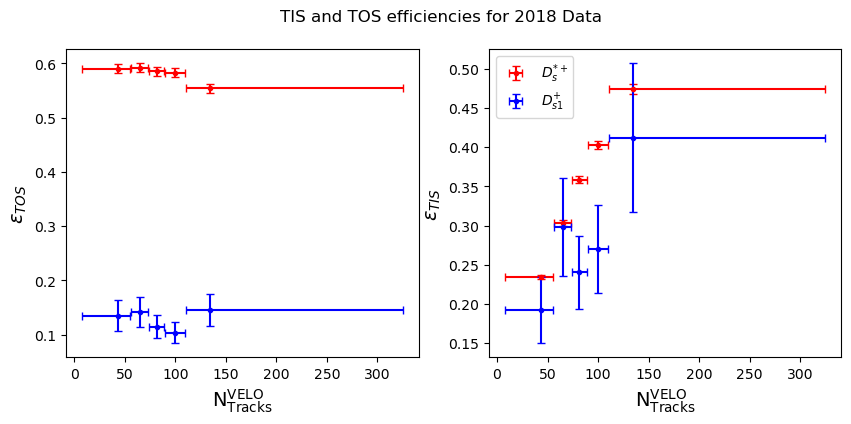

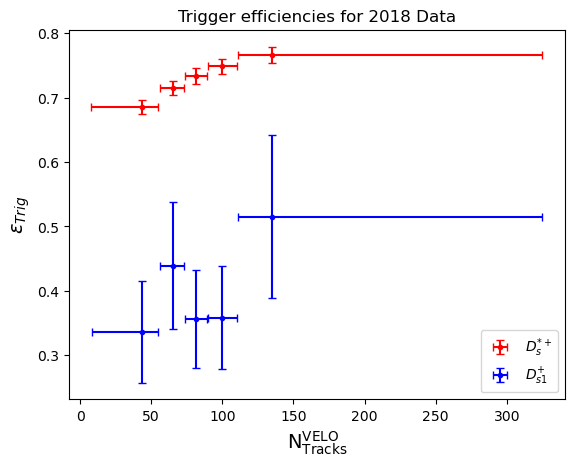

In [8]:
color_Dsst = "red"; color_Ds1 = "blue"

plt.figure(1, figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.errorbar((dfs_Ds1_TIS_vals[0])["nVelo_mean"], eff_TOS_Dsst, ueff_TOS_Dsst, 
              xerr=[(dfs_Ds1_TIS_vals[0])["nVelo_udown"], (dfs_Ds1_TIS_vals[0])["nVelo_uup"]], 
              fmt='.', color=color_Dsst, ecolor=color_Dsst, capsize=3, label=r"$D_{s}^{*+}$")
plt.errorbar((dfs_Ds1_TIS_vals[0])["nVelo_mean"], eff_TOS_Ds1, ueff_TOS_Ds1, 
              xerr=[(dfs_Ds1_TIS_vals[0])["nVelo_udown"], (dfs_Ds1_TIS_vals[0])["nVelo_uup"]], 
              fmt='.', color=color_Ds1, ecolor=color_Ds1, capsize=3, label=r"$D_{s1}^{+}$")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$", fontsize=14)
plt.ylabel(r"$\varepsilon_{TOS}$", fontsize=14)
plt.subplot(1, 2, 2)
plt.errorbar((dfs_Ds1_TIS_vals[0])["nVelo_mean"], eff_TIS_Dsst, ueff_TIS_Dsst, 
              xerr=[(dfs_Ds1_TIS_vals[0])["nVelo_udown"], (dfs_Ds1_TIS_vals[0])["nVelo_uup"]], 
              fmt='.', color=color_Dsst, ecolor=color_Dsst, capsize=3, label=r"$D_{s}^{*+}$")
plt.errorbar((dfs_Ds1_TIS_vals[0])["nVelo_mean"], eff_TIS_Ds1, ueff_TIS_Ds1, 
              xerr=[(dfs_Ds1_TIS_vals[0])["nVelo_udown"], (dfs_Ds1_TIS_vals[0])["nVelo_uup"]], 
              fmt='.', color=color_Ds1, ecolor=color_Ds1, capsize=3, label=r"$D_{s1}^{+}$")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$", fontsize=14)
plt.ylabel(r"$\varepsilon_{TIS}$", fontsize=14)
plt.legend()
plt.suptitle("TIS and TOS efficiencies for 2018 Data")
plt.savefig("Graphs/Exp_MagD18_DsgL_TIS_and_TOS_effs.pdf", dpi=300, bbox_inches='tight')

plt.figure(2)
plt.errorbar((dfs_Ds1_TIS_vals[0])["nVelo_mean"], eff_trig_Dsst, ueff_trig_Dsst, 
              xerr=[(dfs_Ds1_TIS_vals[0])["nVelo_udown"], (dfs_Ds1_TIS_vals[0])["nVelo_uup"]], 
              fmt='.', color=color_Dsst, ecolor=color_Dsst, capsize=3, label=r"$D_{s}^{*+}$")
plt.errorbar((dfs_Ds1_TIS_vals[0])["nVelo_mean"], eff_trig_Ds1, ueff_trig_Ds1, 
              xerr=[(dfs_Ds1_trig_vals[0])["nVelo_udown"], (dfs_Ds1_trig_vals[0])["nVelo_uup"]], 
              fmt='.', color=color_Ds1, ecolor=color_Ds1, capsize=3, label=r"$D_{s1}^{+}$")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$", fontsize=14)
plt.ylabel(r"$\varepsilon_{Trig}$", fontsize=14)
plt.legend()
plt.title("Trigger efficiencies for 2018 Data")
plt.savefig("Graphs/Exp_MagD18_DsgL_trig_effs.pdf", dpi=300, bbox_inches='tight')

In [9]:
def uratio(a, b, ua, ub):
    ratio = a/b
    uratio = ratio * np.sqrt((ua/a)**2+(ub/b)**2)
    return uratio

eff_TIS_ratio = eff_TIS_Dsst / eff_TIS_Ds1
ueff_TIS_ratio = uratio(eff_TIS_Dsst, eff_TIS_Ds1, ueff_TIS_Dsst, ueff_TIS_Ds1)

eff_TOS_ratio = eff_TOS_Dsst / eff_TOS_Ds1
ueff_TOS_ratio = uratio(eff_TOS_Dsst, eff_TOS_Ds1, ueff_TOS_Dsst, ueff_TOS_Ds1)

eff_trig_ratio = eff_trig_Dsst / eff_trig_Ds1
ueff_trig_ratio = uratio(eff_trig_Dsst, eff_trig_Ds1, ueff_trig_Dsst, ueff_trig_Ds1)

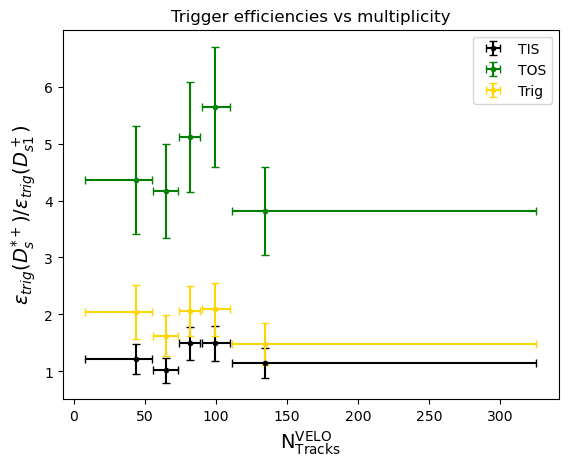

In [10]:
plt.figure(1)
plt.errorbar((dfs_Ds1_TIS_vals[0])["nVelo_mean"], eff_TIS_ratio, ueff_TIS_ratio, 
              xerr=[(dfs_Ds1_TIS_vals[0])["nVelo_udown"], (dfs_Ds1_TIS_vals[0])["nVelo_uup"]], 
              fmt='.', color="black", ecolor="black", capsize=3, label=r"TIS")
plt.errorbar((dfs_Ds1_TIS_vals[0])["nVelo_mean"], eff_TOS_ratio, ueff_TOS_ratio, 
              xerr=[(dfs_Ds1_TIS_vals[0])["nVelo_udown"], (dfs_Ds1_TIS_vals[0])["nVelo_uup"]], 
              fmt='.', color="green", ecolor="green", capsize=3, label=r"TOS")
plt.errorbar((dfs_Ds1_TIS_vals[0])["nVelo_mean"], eff_trig_ratio, ueff_trig_ratio, 
              xerr=[(dfs_Ds1_TIS_vals[0])["nVelo_udown"], (dfs_Ds1_TIS_vals[0])["nVelo_uup"]], 
              fmt='.', color="gold", ecolor="gold", capsize=3, label=r"Trig")
plt.title("Trigger efficiencies vs multiplicity")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$", fontsize=14)
plt.ylabel(r"$\varepsilon_{trig}(D_s^{*+})/\varepsilon_{trig}(D_{s1}^+)$", fontsize=14)
plt.legend()
plt.savefig("Graphs/Exp_MagD18_DsgL_TIS_and_TOS_effs_ratio.pdf", dpi=300, bbox_inches='tight')